# ABM 4 
## Economic games  

In [2]:
from numpy import *
from random import *
from pylab import *
import copy as cp

#parameters
h0 = 50 # initial hawk pop
d0 = 50 # initial dove pop

spots = 8 #number of food patches
patches = range(spots) # and their numbers 
abund = 20 # food items per patch
K = 1000 # carrying capacity of the enviroment

b0 = 5 # agent energy balance at start/ birth
#patchtypes = repeat(range(patch), abund)  this should probably be range(spots) resp. patches
deltabal = -0.15 # energy consumption per round
death_thresh = 0.1
offcost =  8 # energy balance threshold for reproduction


C = 0.2 # cost of resource
V = 1 # value of resource

r = 0.06 # radius for proximity
movrate = 0.05 # initial movement rate
mut = 0.03 # mutation rate in offspring

class agent():
    pass

def initialise(): # create lits for storage
    global agents, environ, pophawk, popdove,\
        payhawk, paydove, mobhawk, mobdove
    agents = [] 
    environ = []
    pophawk = []
    popdove = []
    payhawk = []
    paydove = []
    mobhawk = []
    mobdove = []
    
    for i in range(h0 + d0): # create agents
        ag = agent()
        ag.type = 'hawk' if i < h0 else 'dove'
        ag.x = random()
        ag.y = random()
        ag.mov = movrate
        ag.bal = b0
        agents.append(ag)
           
    for i in range(spots): # create food patches
        env = agent() # food patch env is an agent too
        env.spot = patches[i] # patch number
        env.x = random() # x and y location of patch i
        env.y = random()
        env.value = abund # food abundance in patch
        environ.append(env) # append to list of patches

def observe(): # observed lists  
    global agents, environ, pophawk, popdove,\
        payhawk, paydove, mobhawk, mobdove
    
    subplot(2, 2, 1) # main spatial plot 
    cla()
    
    xfood = [ag.x for ag in environ] # x's and y 
    yfood = [ag.y for ag in environ]
    
    # plot food patches:
    plot(xfood, yfood, c = 'forestgreen',\
         marker = '8', ms = 20, ls = '')
    ax = plt.gca() # this and next line to add background
    ax.set_facecolor('peachpuff')
    
    hawks = [ag for ag in agents if ag.type == 'hawk']
    if len(hawks) > 0:
        x = [ag.x for ag in hawks]
        y = [ag.y for ag in hawks]
        plot(x, y, c = 'indianred', marker = 'o', ms = 8, ls='')
    
    doves = [ag for ag in agents if ag.type == 'dove']
    if len(doves) > 0:
        x = [ag.x for ag in doves]
        y = [ag.y for ag in doves]
        plot(x, y, c = 'snow', marker = 'o', ms = 4, ls='')
    axis('image')
    axis([0, 1, 0, 1]) # x and y limits of plot
        
    subplot(2 ,2 ,3) # plot movement rate
    cla()
    plot(mobhawk, label = 'hawk', c = 'indianred')
    plot(mobdove, label = 'dove', c = 'lightgrey')
    title('Movement rate')
    legend()
   
    subplot(2, 2, 2) # plot population
    cla()
    plot(pophawk, label = 'hawks', c = 'indianred')
    plot(popdove, label = 'dove', c = 'lightgrey')
    title('Population')
    legend()
    
    subplot(2, 2, 4) # plot payoffs 
    cla()
    plot(payhawk, label = 'hawks', c = 'indianred')
    plot(paydove, label = 'dove', c = 'lightgrey')
    title('Energy Balance')
    legend()
  
def update_agent(): 
    global agents, environ, spots # update per step
    if agents == []: # if no agents or food patch, stop
        return
    if environ == []:
        return
    ag = choice(agents) # otherwise select agent
    ag.bal += deltabal # reduce its balance (cost of being alive)
    # list of food patches nearby
    foodplace = [fd for fd in environ if \
                  (fd.x - ag.x)**2 + (fd.y - ag.y)**2\
                      < r**2]
    # list of neighbours nearby
    neighbours = [nb for nb in agents if \
                  (nb.x - ag.x)**2 + (nb.y - ag.y)**2\
                      < r**2]    
    
    if len(foodplace) > 0: # if there is food
        fp = choice(foodplace) # choose food patch
        if len(neighbours) > 0: #if ag has neighbours
            nb = choice(neighbours) # select a neighbour 
            if ag.type == 'hawk': # if ag=hawk and nb=hawk
                if nb.type == 'hawk':
                    ag.bal += (V - C)/2 # payoff to hawk
                    mrate = ag.mov # ag moves
                    ag.x += uniform(-mrate, mrate)
                    ag.y += uniform(-mrate, mrate)
                    ag.x = 1 if ag.x > 1 else 0 if ag.x < 0 else ag.x
                    ag.y = 1 if ag.y > 1 else 0 if ag.y < 0 else ag.y   

                    nb.bal += (V - C)/2 # payoff to hawk
                    nrate = nb.mov
                    nb.x += uniform(-nrate, nrate)
                    nb.y += uniform(-nrate, nrate)
                    nb.x = 1 if nb.x > 1 else 0 if nb.x < 0 else nb.x
                    nb.y = 1 if nb.y > 1 else 0 if nb.y < 0 else nb.y   

                else: # nb is dove
                    ag.bal += V # payoff to hawk
                    nb.bal = nb.bal # nothing for dove
                    nrate = nb.mov
                    nb.x += uniform(-nrate, nrate)
                    nb.y += uniform(-nrate, nrate)
                    nb.x = 1 if nb.x > 1 else 0 if nb.x < 0 else nb.x
                    nb.y = 1 if nb.y > 1 else 0 if nb.y < 0 else nb.y   
                    
            else: #ag is dove
                if nb.type == 'hawk':
                    ag.bal = ag.bal # nothing for dove
                    nb.bal += V # payoff to hawk
                    mrate = ag.mov
                    ag.x += uniform(-mrate, mrate)
                    ag.y += uniform(-mrate, mrate)
                    ag.x = 1 if ag.x > 1 else 0 if ag.x < 0 else ag.x
                    ag.y = 1 if ag.y > 1 else 0 if ag.y < 0 else ag.y                     
                    
                else: # nb is dove
                    ag.bal += V/2  # both get half, both stay
                    nb.bal += V/2

        else: ag.bal += V # no neighbours      
        
        
        fp.value += - V # degradation of selected patch fp
        if fp.value <= 0:  # if fp is depleted
            fp.value = abund # food in new spot
            fp.x = random() # random location
            fp.y = random()


    else: # no food around, move
        mrate = ag.mov
        ag.x += uniform(-mrate, mrate)
        ag.y += uniform(-mrate, mrate)
        ag.x = 1 if ag.x > 1 else 0 if ag.x < 0 else ag.x
        ag.y = 1 if ag.y > 1 else 0 if ag.y < 0 else ag.y   
    
    if ag.bal < death_thresh: # if energy balance below thresh, agent dies
        agents.remove(ag)
    elif ag.bal*(1-len(agents)/K)>= offcost: # otherwise agent reproduces, considering K 
        offspring = cp.copy(ag)
        offspring.mov = ag.mov + uniform(-mut, mut)
        offspring.bal = b0
        agents.append(offspring)        
        
def update():
    global agents, pophawk, popdov, \
        payhawk, paydove, mobhawk, mobdove
    t = 0.
    while t < 1. and len(agents) > 0:
        t += 1. / len(agents)
        update_agent()

    pophawk.append(sum([1 for x in agents if x.type == 'hawk']))
    popdove.append(sum([1 for x in agents if x.type == 'dove']))
    payhawk.append(mean([t.bal for t in agents if t.type == 'hawk']))
    paydove.append(mean([t.bal for t in agents if t.type == 'dove']))
    mobhawk.append(mean([t.mov for t in agents if t.type == 'hawk']))
    mobdove.append(mean([t.mov for t in agents if t.type == 'dove']))
 

import pycxsimulator
pycxsimulator.GUI().start(func=[initialise, observe, update])



In [8]:
#my version

from numpy import *
from random import *
from pylab import *
import copy as cp
%matplotlib

#parameters
h0 = 50 # initial hawk pop
d0 = 50 # initial dove pop

spots = 8 #number of food patches
patches = range(spots) # and their numbers 
abund = 20 # food items per patch
K = 1000 # carrying capacity of the enviroment

b0 = 5 # agent energy balance at start/ birth
#patchtypes = repeat(range(patch), abund)  this should probably be range(spots) resp. patches
deltabal = -0.15 # energy consumption per round
death_thresh = 0.1
offcost =  8 # energy balance threshold for reproduction


C = 0.2 # cost of resource
V = 1 # value of resource

r = 0.06 # radius for proximity
movrate = 0.05 # initial movement rate
mut = 0.03 # mutation rate in offspring

steplimit = 200

class agent():
    pass

def initialise(): # create lits for storage
    global agents, environ, pophawk, popdove,\
        payhawk, paydove, mobhawk, mobdove, steps, done
    agents = [] 
    environ = []
    pophawk = [h0]
    popdove = [d0]
    payhawk = [b0]
    paydove = [b0]
    mobhawk = [movrate]
    mobdove = [movrate]
    steps = 0
    done = False

    for i in range(h0 + d0): # create agents
        ag = agent()
        ag.type = 'hawk' if i < h0 else 'dove'
        ag.x = random()
        ag.y = random()
        ag.mov = movrate
        ag.bal = b0
        agents.append(ag)
           
    for i in range(spots): # create food patches
        env = agent() # food patch env is an agent too
        env.spot = patches[i] # patch number
        env.x = random() # x and y location of patch i
        env.y = random()
        env.value = abund # food abundance in patch
        environ.append(env) # append to list of patches

def observe(): # observed lists  
    global agents, environ, pophawk, popdove,\
        payhawk, paydove, mobhawk, mobdove

    subplot(2, 2, 1) # main spatial plot 
    cla()
    
    xfood = [ag.x for ag in environ] # x's and y 
    yfood = [ag.y for ag in environ]
    
    # plot food patches:
    plot(xfood, yfood, c = 'forestgreen',\
         marker = '8', ms = 20, ls = '')
    ax = plt.gca() # this and next line to add background
    ax.set_facecolor('peachpuff')
    
    hawks = [ag for ag in agents if ag.type == 'hawk']
    if len(hawks) > 0:
        x = [ag.x for ag in hawks]
        y = [ag.y for ag in hawks]
        plot(x, y, c = 'indianred', marker = 'o', ms = 8, ls='')
    
    doves = [ag for ag in agents if ag.type == 'dove']
    if len(doves) > 0:
        x = [ag.x for ag in doves]
        y = [ag.y for ag in doves]
        plot(x, y, c = 'snow', marker = 'o', ms = 4, ls='')
    axis('image')
    axis([0, 1, 0, 1]) # x and y limits of plot
        
    subplot(2 ,2 ,3) # plot movement rate
    cla()
    hawktemp = round(mobhawk[len(mobhawk) - 1], 4)
    dovetemp = round(mobdove[len(mobdove) - 1], 4)
    plot(mobhawk, label = 'hawks: {}'.format(hawktemp), c = 'indianred')
    plot(mobdove, label = 'doves: {}'.format(dovetemp), c = 'lightgrey')
    title('Mean Movement Rate')
    legend()
   
    subplot(2, 2, 2) # plot population
    cla()
    hawktemp = pophawk[len(pophawk) - 1]
    dovetemp = popdove[len(popdove) - 1]
    plot(pophawk, label = 'hawks: {}'.format(hawktemp), c = 'indianred')
    plot(popdove, label = 'doves: {}'.format(dovetemp), c = 'lightgrey')
    title('Population')
    legend()
    
    subplot(2, 2, 4) # plot payoffs 
    cla()
    hawktemp = round(payhawk[len(payhawk) - 1], 2)
    dovetemp = round(paydove[len(paydove) - 1], 2)
    plot(payhawk, label = 'hawks: {}'.format(hawktemp), c = 'indianred')
    plot(paydove, label = 'doves: {}'.format(dovetemp), c = 'lightgrey')
    title('Mean Energy Balance')
    legend()
  
def update_agent(): 
    global agents, environ, spots # update per step

    if agents == []: # if no agents or food patch, stop
        return
    if environ == []:
        return
    ag = choice(agents) # otherwise select agent
    ag.bal += deltabal # reduce its balance (cost of being alive)
    # list of food patches nearby
    foodplace = [fd for fd in environ if \
                  (fd.x - ag.x)**2 + (fd.y - ag.y)**2\
                      < r**2]
    # list of neighbours nearby
    neighbours = [nb for nb in agents if \
                  (nb.x - ag.x)**2 + (nb.y - ag.y)**2\
                      < r**2]    
    
    if len(foodplace) > 0: # if there is food
        fp = choice(foodplace) # choose food patch
        if len(neighbours) > 0: #if ag has neighbours
            nb = choice(neighbours) # select a neighbour 
            if ag.type == 'hawk': # if ag=hawk and nb=hawk
                if nb.type == 'hawk':
                    ag.bal += (V - C)/2 # payoff to hawk
                    mrate = ag.mov # ag moves
                    ag.x += uniform(-mrate, mrate)
                    ag.y += uniform(-mrate, mrate)
                    ag.x = 1 if ag.x > 1 else 0 if ag.x < 0 else ag.x
                    ag.y = 1 if ag.y > 1 else 0 if ag.y < 0 else ag.y   

                    nb.bal += (V - C)/2 # payoff to hawk
                    nrate = nb.mov
                    nb.x += uniform(-nrate, nrate)
                    nb.y += uniform(-nrate, nrate)
                    nb.x = 1 if nb.x > 1 else 0 if nb.x < 0 else nb.x
                    nb.y = 1 if nb.y > 1 else 0 if nb.y < 0 else nb.y   

                else: # nb is dove
                    ag.bal += V # payoff to hawk
                    nb.bal = nb.bal # nothing for dove
                    nrate = nb.mov
                    nb.x += uniform(-nrate, nrate)
                    nb.y += uniform(-nrate, nrate)
                    nb.x = 1 if nb.x > 1 else 0 if nb.x < 0 else nb.x
                    nb.y = 1 if nb.y > 1 else 0 if nb.y < 0 else nb.y   
                    
            else: #ag is dove
                if nb.type == 'hawk':
                    ag.bal = ag.bal # nothing for dove
                    nb.bal += V # payoff to hawk
                    mrate = ag.mov
                    ag.x += uniform(-mrate, mrate)
                    ag.y += uniform(-mrate, mrate)
                    ag.x = 1 if ag.x > 1 else 0 if ag.x < 0 else ag.x
                    ag.y = 1 if ag.y > 1 else 0 if ag.y < 0 else ag.y                     
                    
                else: # nb is dove
                    ag.bal += V/2  # both get half, both stay
                    nb.bal += V/2

        else: ag.bal += V # no neighbours      
        
        
        fp.value += - V # degradation of selected patch fp
        if fp.value <= 0:  # if fp is depleted
            fp.value = abund # food in new spot
            fp.x = random() # random location
            fp.y = random()


    else: # no food around, move
        mrate = ag.mov
        ag.x += uniform(-mrate, mrate)
        ag.y += uniform(-mrate, mrate)
        ag.x = 1 if ag.x > 1 else 0 if ag.x < 0 else ag.x
        ag.y = 1 if ag.y > 1 else 0 if ag.y < 0 else ag.y   
    
    if ag.bal < death_thresh: # if energy balance below thresh, agent dies
        agents.remove(ag)
    elif ag.bal*(1-len(agents)/K)>= offcost: # otherwise agent reproduces, considering K 
        offspring = cp.copy(ag)
        offspring.mov = ag.mov + uniform(-mut, mut)
        offspring.bal = b0
        agents.append(offspring)        
        
def update():
    global agents, pophawk, popdov, \
        payhawk, paydove, mobhawk, mobdove

    t = 0.
    while t < 1. and len(agents) > 0:
        t += 1. / len(agents)
        update_agent()

    pophawk.append(sum([1 for x in agents if x.type == 'hawk']))
    popdove.append(sum([1 for x in agents if x.type == 'dove']))
    payhawk.append(mean([t.bal for t in agents if t.type == 'hawk']))
    paydove.append(mean([t.bal for t in agents if t.type == 'dove']))
    mobhawk.append(mean([t.mov for t in agents if t.type == 'hawk']))
    mobdove.append(mean([t.mov for t in agents if t.type == 'dove']))
 

import pycxsimulator
pycxsimulator.GUI().start(func=[initialise, observe, update])



Using matplotlib backend: TkAgg
C:\Users\Pascal\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Pascal\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [35]:
def showplots(tempax = None, tempfig = None, mytitle = None): # observed lists
    global agents, environ, pophawk, popdove,\
        payhawk, paydove, mobhawk, mobdove

    %matplotlib inline

    if tempax is None:
        tempax = plt.gca()

    if tempfig is None:
        tempfig = plt.gcf()
    
    subplot(2, 2, 1) # main spatial plot 
    cla()
    
    xfood = [ag.x for ag in environ] # x's and y 
    yfood = [ag.y for ag in environ]
    
    # plot food patches:
    plot(xfood, yfood, c = 'forestgreen',\
         marker = '8', ms = 10, ls = '')
    ax = plt.gca()
    ax.set_facecolor('peachpuff')
    
    hawks = [ag for ag in agents if ag.type == 'hawk']
    if len(hawks) > 0:
        x = [ag.x for ag in hawks]
        y = [ag.y for ag in hawks]
        plot(x, y, c = 'indianred', marker = 'o', ms = 4, ls='')
    
    doves = [ag for ag in agents if ag.type == 'dove']
    if len(doves) > 0:
        x = [ag.x for ag in doves]
        y = [ag.y for ag in doves]
        plot(x, y, c = 'snow', marker = 'o', ms = 2, ls='')
    axis('image')
    axis([0, 1, 0, 1]) # x and y limits of plot
        
    subplot(2 ,2 ,3) # plot movement rate
    cla()
    hawktemp = round(mobhawk[len(mobhawk) - 1], 4)
    dovetemp = round(mobdove[len(mobdove) - 1], 4)
    plot(mobhawk, label = 'hawks: {}'.format(hawktemp), c = 'indianred')
    plot(mobdove, label = 'doves: {}'.format(dovetemp), c = 'lightgrey')
    title('Mean Movement Rate')
    legend()
   
    subplot(2, 2, 2) # plot population
    cla()
    hawktemp = pophawk[len(pophawk) - 1]
    dovetemp = popdove[len(popdove) - 1]
    plot(pophawk, label = 'hawks: {}'.format(hawktemp), c = 'indianred')
    plot(popdove, label = 'doves: {}'.format(dovetemp), c = 'lightgrey')
    title('Population')
    legend()
    
    subplot(2, 2, 4) # plot payoffs 
    cla()
    hawktemp = round(payhawk[len(payhawk) - 1], 2)
    dovetemp = round(paydove[len(paydove) - 1], 2)
    plot(payhawk, label = 'hawks: {}'.format(hawktemp), c = 'indianred')
    plot(paydove, label = 'doves: {}'.format(dovetemp), c = 'lightgrey')
    title('Mean Energy Balance')
    legend()
    
    if mytitle != None:
        tempfig.suptitle(mytitle)

    tight_layout()

    return(tempax)

<AxesSubplot:>

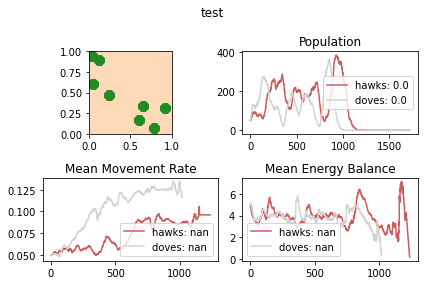

In [36]:
showplots(mytitle = "test")